<a href="https://colab.research.google.com/github/vannella/AnaliseRotatividade/blob/main/rotatividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da Rotatividade em uma Empresa de Tecnologia**
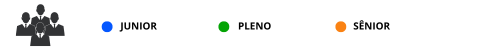

**Introdução**

Recentemente, a empresa de tecnologia enfrentou um desafio significativo em 04 de maio de 2024: a demissão de **144 funcionários** em um único dia. Como analista de dados, minha missão foi investigar as causas dessa alta rotatividade e identificar padrões que possam informar estratégias de retenção de talentos. Utilizei uma combinação de gráficos e análises detalhadas para entender melhor a dinâmica interna da nossa organização.

## Entendimento Inicial dos Dados

Algumas perguntas foram elaboradas com base nas variáveis identificadas.

* Horas Extras e Desempenho: Como as horas extras afetam o desempenho dos funcionários?
* Satisfação e Nível de Cargo: Como a satisfação varia entre funcionários de diferentes níveis de cargo (júnior, pleno, sênior)?
* Desligamentos e Nível de Cargo: Qual nível de cargo (júnior, pleno, sênior) tem a maior taxa de desligamentos?

## Importação das Bibliotecas e Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Importando Arquivo

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pasta 1.xlsx to Pasta 1.xlsx


In [ ]:
file_path = 'Pasta 1.xlsx'
analise_df = pd.read_excel(file_path, sheet_name='Analise', header=2)
planilha1_df = pd.read_excel(file_path, sheet_name='Planilha1', header=1)


## Dicionário de dados

| Coluna               | Tipo_Campo | Descrição                                          |
|----------------------|------------|----------------------------------------------------|
| Data_Contratacao     | Data       | Data de contratação                                |
| Data_Desligamento    | Data       | Data de desligamento ou texto se ainda na empresa  |
| Meses_de_Servico     | Inteiro    | Meses completos de serviço                         |
| Idade                | Inteiro    | Idade na contratação                               |
| Pontuacao_Desempenho | Flutuante  | Avaliação de desempenho                            |
| Satisfacao_Trabalho  | Flutuante  | Nível de satisfação no trabalho                    |
| Nivel_Cargo          | Texto      | Nível hierárquico                                  |
| Salário              | Flutuante  | Salário bruto mensal                               |
| Horas_Extras         | Flutuante  | Horas extras trabalhadas                           |
| Desligamento         | Inteiro    | Indica se está na empresa (0) ou desligado (1)     |


### Limpeza e Tratamento dos Dados

In [ ]:
# Limpar e preparar os dados da planilha 'Analise'
analise_df.columns = analise_df.iloc[0]
analise_df = analise_df.drop(0).reset_index(drop=True)

In [ ]:
# Ver os primeiros registros
print(analise_df.head())

0                      NaN        Junior Pleno       Sênior  Total Geral  NaN  \
0  Contagem de Nivel_Cargo           233   225          192          650  NaN   
1                      NaN           NaN   NaN          NaN          NaN  NaN   
2     Soma de Desligamento  Desligamento   NaN          NaN          NaN  NaN   
3                  %_Cargo             0     1  Total Geral  Total Geral  NaN   
4                   Junior             0    56           56            1  NaN   

0 Idade  Junior Pleno Sênior  ...  NaN  NaN  NaN       Junior  \
0    18      46   NaN    NaN  ...  NaN  NaN  NaN        Pleno   
1    19      25   NaN    NaN  ...  NaN  NaN  NaN       Sênior   
2    20      33   NaN    NaN  ...  NaN  NaN  NaN  Total Geral   
3    21      31   NaN    NaN  ...  NaN  NaN  NaN          NaN   
4    22      33    15    NaN  ...  NaN  NaN  NaN          NaN   

0  671.3734272529995  NaN  NaN  Horas_Extras  1  Total Geral  
0         674.111302  NaN  NaN        0.0552  1            

In [ ]:
# Excluir ou preencher valores nulos
analise_df.dropna(inplace=True)

* Detecção de valores nulos e inconsistências nos dados
* Pontuação ou Avaliação: diminuir 8 números para a esquerda,
se referindo a uma escala de pontuação, como uma avaliação de desempenho ou satisfação no trabalho

# Contexto

**Turnover** é a taxa de troca de funcionários em uma empresa. Ele mostra quantas pessoas saem da empresa em relação ao número total de funcionários em um certo período.

Uma breve leitura no site da [Alura](https://www.alura.com.br/empresas/artigos/turnover) sobre a taxa de turnover diz:

> Segundo especialistas de mercado, a taxa ideal de turnover é entre 5% e 10% ao ano.

Na área de tecnologia, o turnover também é relevante as possíveis Causas: Exaustão, tratamento diferenciado, remuneração inadequada e cultura organizacional tóxica.


## Proporção de Desligamentos

Nesse caso, a rotatividade existe porque há uma mudança no quadro de funcionários devido às demissões.

<br>

 **Taxa de Turnover Geral = (144/650) ×100 ≈ 22,15%**

<br>


O turnover involuntário de **22%** em uma empresa de tecnologia pode ser considerado **alto** e tem implicações significativas.

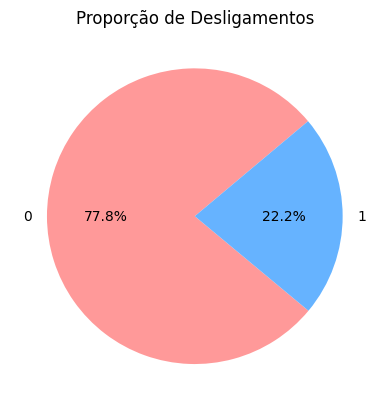

In [ ]:
# Gráfico de pizza para proporção de desligamentos
desligamento_counts = planilha1_df['Desligamento'].value_counts()
desligamento_counts.plot(kind='pie', autopct='%1.1f%%', startangle=40, colors=['#ff9999','#66b3ff'])
plt.title('Proporção de Desligamentos')
plt.ylabel('')
plt.show()

# Desligamentos por Nível de Cargo

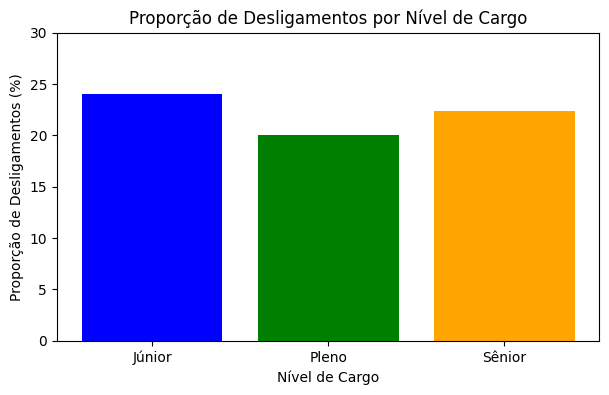

In [ ]:

# Dados
cargos = ['Júnior', 'Pleno', 'Sênior']
proporcao_desligamentos = [24.0, 20.0, 22.4]  # em porcentagem

# Criação do Gráfico de Barras
plt.figure(figsize=(7, 4))
plt.bar(cargos, proporcao_desligamentos, color=['blue', 'green', 'orange'])
plt.xlabel('Nível de Cargo')
plt.ylabel('Proporção de Desligamentos (%)')
plt.title('Proporção de Desligamentos por Nível de Cargo')
plt.ylim(0, 30)
plt.show()


**Dados de Rotatividade**<br>
A tabela abaixo mostra o número de desligamentos por nível de cargo:

| Nível de Cargo | Total de Funcionários | Desligados    | % de Desligamentos |
|----------------|-----------------------|---------------|--------------------|
| Júnior         | 233                   | 56            | 24.0%              |
| Pleno          | 225                   | 45            | 20.0%              |
| Sênior         | 192                   | 43            | 22.4%              |
| Total Geral    | 650                   | 144           | 22.2%              |

A maior porcentagem de desligamentos ocorre no nível **Júnior**, seguido pelos níveis Sênior e Pleno.


# Distribuição de idades

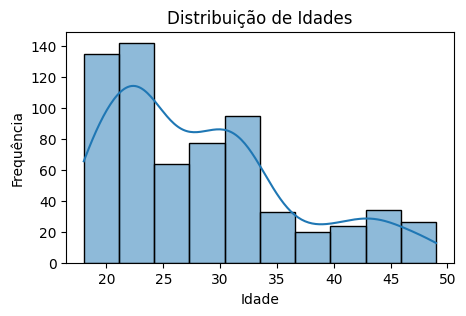

In [ ]:
# Histograma para distribuição de idades
plt.figure(figsize=(5, 3))
sns.histplot(planilha1_df['Idade'], bins=10, kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

O gráfico mostra um histograma da distribuição de idades de um conjunto de dados, com uma curva de densidade (KDE) sobreposta.<br> A maioria das idades está entre 20 e 30 anos, com o pico de frequência em torno dos 25 anos.<br> Este intervalo de idades é típico de funcionários em posições de nível Júnior, que são geralmente ocupadas por profissionais no início de suas carreiras.<br> A frequência diminui gradativamente após os 30 anos, com menos pessoas nas faixas etárias mais altas.

# Análise do Gráfico de Satisfação no Trabalho ao Longo do Tempo

In [ ]:
# Preparar os dados da planilha 'Planilha1'
planilha1_df.columns = ['Data_Contratacao', 'Data_Desligamento', 'Meses_de_Servico', 'Idade',
                        'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Nivel_Cargo', 'Salario',
                        'Horas_Extras', 'Desligamento']

<ipython-input-18-25b4fcc97f84>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=planilha1_df, x='Data_Contratacao', y='Satisfacao_Trabalho', ci=None)


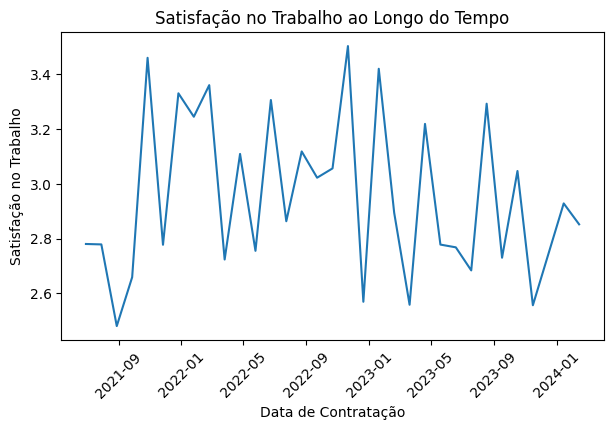

In [ ]:
# Gráfico de linha para satisfação no trabalho ao longo do tempo
plt.figure(figsize=(7, 4))
sns.lineplot(data=planilha1_df, x='Data_Contratacao', y='Satisfacao_Trabalho', ci=None)
plt.title('Satisfação no Trabalho ao Longo do Tempo')
plt.xlabel('Data de Contratação')
plt.ylabel('Satisfação no Trabalho')
plt.xticks(rotation=45)
plt.show()

**Variação Significativa**

A satisfação no trabalho apresenta variações significativas ao longo do tempo, com picos e vales marcantes que indicam períodos de alta e baixa satisfação entre os funcionários.

**Tendências Específicas**

Setembro de 2021: Observa-se um pico de satisfação seguido por uma queda acentuada.
Janeiro de 2022: A satisfação aumenta novamente, atingindo outro pico significativo, antes de diminuir.
Janeiro de 2023: A satisfação atinge seu ponto mais alto, seguido por uma nova série de flutuações.

**Padrões de Alta Frequência**

A satisfação oscila com alta frequência, sugerindo que eventos frequentes ou mudanças no ambiente de trabalho podem estar afetando a percepção dos funcionários de maneira regular.

**Períodos de Baixa Satisfação**

**Pós-Setembro de 2021:** Após o pico em setembro, há uma queda acentuada na satisfação.

**Meados de 2022:** Outro período de baixa satisfação é observado, indicando possíveis problemas recorrentes.



# Distribuição de idade e salário:

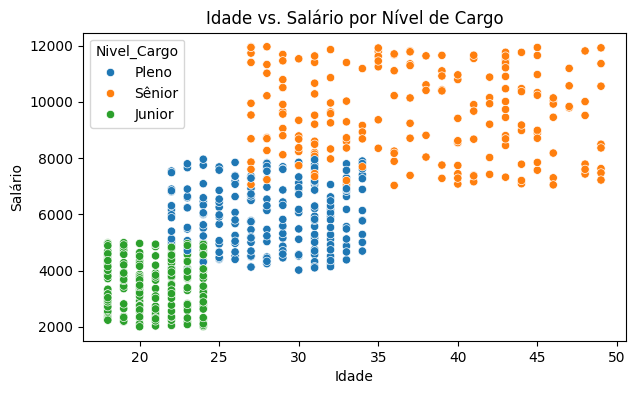

In [ ]:
# Gráfico de dispersão para idade vs. salário
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Idade', y='Salario', hue='Nivel_Cargo', data=planilha1_df)
plt.title('Idade vs. Salário por Nível de Cargo')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

**Distribuição de idade e salário:**<br>
A maioria dos funcionários júnior está na faixa etária de 20 a 30 anos, com salários entre 2000 e 6000.<br>
Funcionários plenos estão na faixa etária de 25 a 35 anos, com salários entre 4000 e 8000.<br>
Funcionários seniores estão na faixa etária de 30 a 50 anos, com salários entre 6000 e 12000.<br>

#  Desempenho e Satisfação no Trabalho

Para compreender melhor a dinâmica dos desligamentos, avaliamos o desempenho e a satisfação no trabalho de cada nível de cargo, em uma escala de 1 a 5.

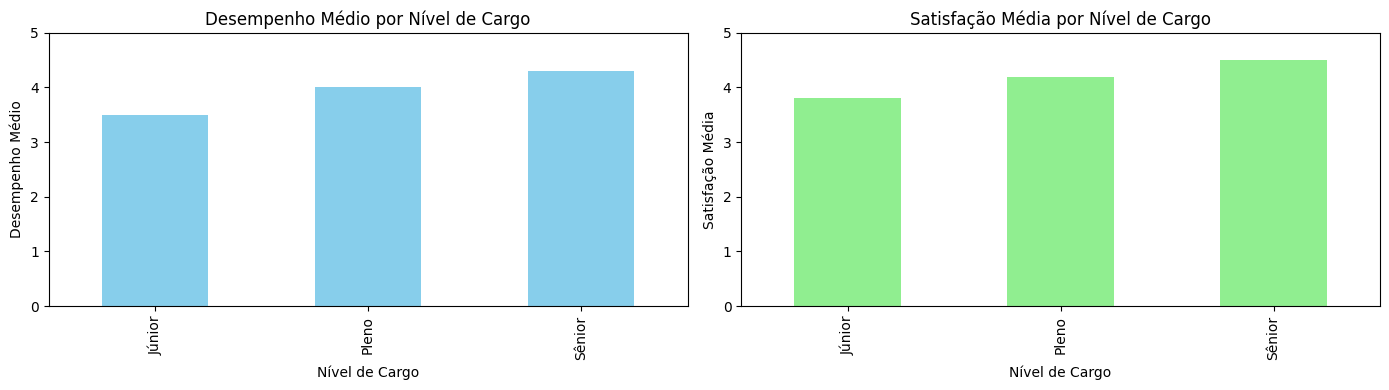

In [ ]:
# Exemplo de dados
data = {
    'Nível de Cargo': ['Júnior', 'Pleno', 'Sênior'],
    'Desempenho Médio': [3.5, 4.0, 4.3],
    'Satisfação Média': [3.8, 4.2, 4.5]
}

# Criação do DataFrame
df = pd.DataFrame(data)

# Definir as variáveis de desempenho e satisfação média
desempenho = df.set_index('Nível de Cargo')['Desempenho Médio']
satisfacao_media = df.set_index('Nível de Cargo')['Satisfação Média']

# Plotar os resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico de Desempenho
desempenho.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Desempenho Médio por Nível de Cargo')
ax[0].set_xlabel('Nível de Cargo')
ax[0].set_ylabel('Desempenho Médio')
ax[0].set_ylim(0, 5)

# Gráfico de Satisfação
satisfacao_media.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Satisfação Média por Nível de Cargo')
ax[1].set_xlabel('Nível de Cargo')
ax[1].set_ylabel('Satisfação Média')
ax[1].set_ylim(0, 5)

# Mostrar os gráficos
plt.tight_layout()
plt.show()


Diferença entre Satisfação e Desempenho por Nível de Cargo:


|   Nivel    | Desempenho | Satisfacao | Diferença  |
|------------|------------|------------|------------|
|   Junior   |    3.5     |    3.8     |     0.3    |
|   Pleno    |    4.0     |    4.2     |     0.2    |
|   Senior   |    4.3     |    4.5     |     0.2    |
<br>



**Satisfação e Desempenho:**

Apesar dos **Juniors** terem uma diferença maior entre satisfação e desempenho, eles ainda têm a maior taxa de desligamento. Isso pode indicar que, embora estejam relativamente satisfeitos, outros fatores como desenvolvimento de carreira, remuneração ou condições de trabalho podem estar influenciando sua decisão de deixar a empresa.<br>

Os **Plenos têm a menor taxa de desligamento e uma boa relação entre satisfação e desempenho**, indicando que este grupo está relativamente mais estável e contente com suas condições de trabalho.

## Desempenho ao longo do tempo

<ipython-input-25-8ece97b0b061>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=planilha1_df, x='Data_Contratacao', y='Pontuacao_Desempenho', ci=None)


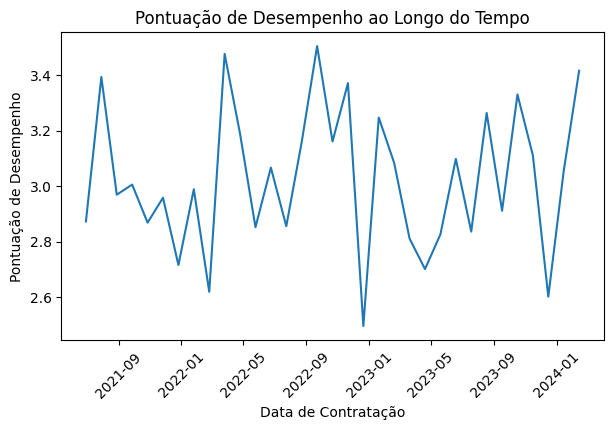

In [ ]:
# Gráfico de linhas para pontuação de desempenho ao longo do tempo
plt.figure(figsize=(7, 4))
sns.lineplot(data=planilha1_df, x='Data_Contratacao', y='Pontuacao_Desempenho', ci=None)
plt.title('Pontuação de Desempenho ao Longo do Tempo')
plt.xlabel('Data de Contratação')
plt.ylabel('Pontuação de Desempenho')
plt.xticks(rotation=45)
plt.show()

## Horas Extras por nível de cargo:

**Junior:** 19 horas<br>
**Pleno:** 19 horas<br>
**Sênior:** 41 horas<br>

Os funcionários de **nível Sênior** estão fazendo significativamente **mais horas extras** em comparação com os níveis Júnior e Pleno. Isso pode ser um fator de insatisfação.

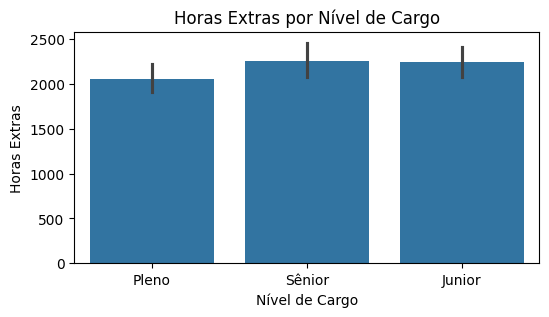

Nivel_Cargo
Junior    19.7824
Pleno     19.9842
Sênior    41.6384
Name: Horas_Extras, dtype: float64


In [ ]:
# Gráfico de barras para horas extras por nível de cargo
plt.figure(figsize=(6, 3))
sns.barplot(x='Nivel_Cargo', y='Horas_Extras', data=planilha1_df, estimator=sum)
plt.title('Horas Extras por Nível de Cargo')
plt.xlabel('Nível de Cargo')
plt.ylabel('Horas Extras')
plt.show()
print(planilha1_df.groupby('Nivel_Cargo')['Horas_Extras'].max())

# Conclusão:

Esses insights indicam a necessidade de intervenções específicas para reduzir a rotatividade. Para os Sêniors, é crucial abordar a questão da sobrecarga de trabalho e promover um melhor equilíbrio entre vida profissional e pessoal. Para os Juniors, a empresa deve focar em melhorar as oportunidades de crescimento, ajustar a remuneração e criar condições de trabalho mais atraentes. Abordar essas áreas pode ajudar a aumentar a satisfação geral e diminuir a rotatividade em todos os níveis da organização

### Análises e Insights Relevantes:

**Carga de Trabalho e Horas Extras:** A identificação de que os funcionários Sênior estão realizando mais horas extras destaca a sobrecarga de trabalho como um fator crítico de insatisfação e rotatividade.

**Satisfação e Desempenho:** A análise revelou que, apesar da relativa satisfação dos funcionários Júnior, a alta taxa de desligamento neste grupo aponta para questões além da satisfação imediata, como oportunidades de crescimento e remuneração.

**Importância dos Insights:**

Esses insights são cruciais para o desenvolvimento de estratégias eficazes de retenção. Ao entender as causas específicas da rotatividade em diferentes níveis de cargo, o RH pode direcionar suas iniciativas de forma mais precisa e eficaz.

## Próximos Passos
Usar machine learning para prever a saída de funcionários. Treinando algoritmos, identificaremos quem está em risco, permitindo ações preventivas para melhorar a retenção.



### Sugestões para RH:
Com base nas análises e insights, o RH pode planejar e implementar várias ações para melhorar a satisfação dos funcionários e reduzir a rotatividade, tais como:



* Desenvolvimento de Liderança: Investir em programas de desenvolvimento de liderança para garantir que os gestores estejam preparados para apoiar suas equipes, promover uma cultura de apoio e minimizar o impacto negativo do tratamento diferenciado.
* Mentoria e Coaching: Estabelecer programas de mentoria e coaching para apoiar o crescimento profissional dos funcionários e oferecer orientação personalizada, especialmente para os níveis Júnior que buscam desenvolvimento de carreira.
* Desenvolvimento de Carreira: Criar programas de desenvolvimento de carreira e mentoria para funcionários Júnior, oferecendo oportunidades claras de crescimento e promoção dentro da empresa.

Foi de extrema importância para o departamento de RH compreender a existência de alta rotatividade na empresa, pois esse entendimento permite uma análise mais aprofundada das causas subjacentes e das áreas que necessitam de melhorias. Através das análises e insights obtidos, o RH pode identificar padrões de insatisfação e os fatores que estão impulsionando a saída dos funcionários.

**Referências digitais:**

[turnover-involuntario](https://blog.solides.com.br/turnover-involuntario/)

[Desligamentos nas organizaçõe](https://pinpeople.com.br/blog/5-motivos-de-desligamento-nas-organizacoes)



**Autor(a) desta análise:**

github: [Giovana Fernanda](https://github.com/Vannella)